In [1]:
from mlp import MLP
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline
data, label = make_moons(n_samples=1000, noise=0.2)

Using gpu device 0: GeForce GT 740M


(1000, 2)
(1000,)


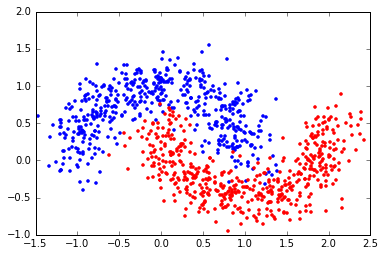

In [2]:
print(data.shape)
print(label.shape)

plt.plot(data[label==0,0], data[label==0,1],'.')
plt.plot(data[label==1,0], data[label==1,1],'r.')

# Using MLP with sklearn's cross_val_score

In [3]:

from sklearn.cross_validation import cross_val_score

clf = MLP(n_hidden=10, n_deep=3, l1_norm=0, drop=0.1, verbose=0)

scores = cross_val_score(clf, data, label, cv=5, n_jobs=-1, scoring='f1_weighted')
print(scores)

[ 0.949995    0.969997    0.95494481  0.9448884   0.94997999]


# Using MLP with sklearn's GridSearchCV

In [4]:
from sklearn.grid_search import GridSearchCV

params = {'n_hidden': [10, 15], 
         'l1_norm': [0.0],
         'n_deep': [2, 3],
         'drop': [0.1]}

clf_grid = GridSearchCV(clf, param_grid=params, scoring='f1_weighted', cv=5, n_jobs=-1)
scores = cross_val_score(clf_grid, data, label, cv=5, n_jobs=1, scoring='f1_weighted')
print(scores)

[ 0.96499912  0.99        0.97499937  0.9448884   0.96499912]


# Extracting layer representation

In [8]:
clf.fit(data, label)
layers = clf.feed_forward(data)

[(1000, 10), (1000, 5), (1000, 2), (1000, 1)]


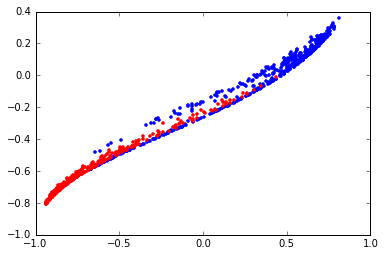

In [12]:
print([layer.shape for layer in layers])

plt.plot(layers[2][label==0,0], layers[2][label==0,1],'.')
plt.plot(layers[2][label==1,0], layers[2][label==1,1],'r.')